#### Disclaimer:

I'm not a doctor, I don't have a medical education or epidemic expertise.
But it's hard to find a proper answer to the question below, so I checked two different versions.

Please, don't consider this material as a  proof of something, it's nothing more than numerical estimations of different hypothesis.


## Why does Italy have such a high rate of coronavirus?

In [254]:
# Data from https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/
countries = pd.read_csv('corona_cases_countries_20_03_14.csv', delimiter = ',')
countries['death_per_case_perc'] = countries['Total Deaths'] / countries['Total Cases']*100
countries[['Country/Other','Total Cases','Total Deaths','death_per_case_perc']][:10]


,Country/Other,Total Cases,Total Deaths,death_per_case_perc
0,China,80824.0,3189.0,3.945610
1,Italy,21157.0,1441.0,6.810985
2,Iran,12729.0,611.0,4.800063
3,S. Korea,8086.0,72.0,0.890428
4,Spain,6315.0,193.0,3.056215
5,Germany,4525.0,8.0,0.176796
6,France,4469.0,91.0,2.036250
7,USA,2499.0,55.0,2.200880
8,Switzerland,1375.0,13.0,0.945455
9,UK,1140.0,21.0,1.842105


In [255]:
dr_sk = countries.loc[3].death_per_case_perc
dr_it = countries.loc[1].death_per_case_perc

print(f'Death rate is SKorea is {dr_sk:2.2} \nand in Italy {dr_it:2.2}\nthe difference is {dr_it/dr_sk:2.2} times')

Death rate is SKorea is 0.89 
and in Italy 6.8
the difference is 7.6 times


Many articles claim, that it's mostly because of older generation in comparision to other countries

* https://www.livescience.com/why-italy-coronavirus-deaths-so-high.html
* https://www.scientificamerican.com/article/why-deaths-from-coronavirus-are-so-high-in-italy/
    

,Age,Korea,Italy,K - I
0,0-4,3.84478,3.93483,-0.0900508
1,5-9,4.4341,4.49385,-0.059749
2,10-14,4.46756,4.73792,-0.270355
3,15-19,5.07191,4.74239,0.329522
4,20-24,6.49336,4.88079,1.61258
5,25-29,6.77723,5.25169,1.52554
6,30-34,6.51646,5.59852,0.917941
7,35-39,7.53294,6.12854,1.4044
8,40-44,7.7897,7.14171,0.647982
9,45-49,8.4718,8.09388,0.377928


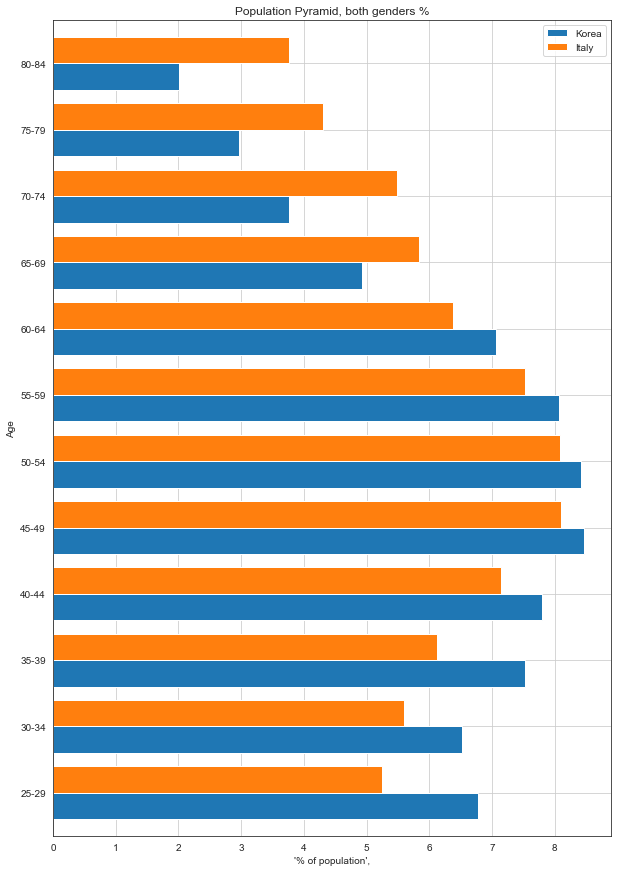

In [256]:
# Age pyramids from
# https://www.populationpyramid.net/italy/2019/
from IPython.display import display, HTML

import pandas as pd
kor = pd.read_csv('Republic of Korea-2019.csv', delimiter = ',')
itl = pd.read_csv('Italy-2019.csv', delimiter = ',')
for df in [kor,itl]:
    df['total'] = df.M+df.F
    df['ratio'] = df.total / df.total.sum()*100
kor_itl = pd.DataFrame( [kor.Age, kor.ratio, itl.ratio, kor.ratio - itl.ratio]).transpose()
kor_itl.columns = ['Age','Korea', 'Italy', 'K - I']
display(kor_itl)

lines = kor_itl[5:-4].plot.barh(x='Age', y=['Korea','Italy'],
                                 label = ['Korea','Italy'], grid=True,
                                 title='Population Pyramid, both genders %',
                                 width=0.8,
                                 figsize=(10,15))
lines.set_xlabel("'% of population',");



Well, we may see that at least one half of this statement is true, Korea is really younger nation.
And we already know, that older people are more often become victims of COVID19.

But I claim, that this difference in an age structure is not sufficient alon to explain such a huge difference in death rate.

There are two sources of death rate, we can relly on

* Age death rate statistics from China
* Amount of death in Italy

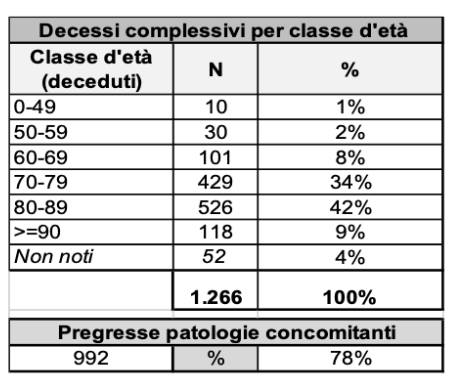



In [257]:
# Death rate by ages from
# https://www.buzzfeednews.com/article/lamvo/coronavirus-death-rates-age-charts-us-china
# Based on chinise data
import numpy as np
death_rate_A = np.flip(np.repeat([14.8,14.8,14.8,8.0,3.6,1.3,0.4,0.2,0.2,0.2,0.0],2)[1:])/100

# Death rate based on Italy
# And naive assumption that all ages got ill uniformly
# This assumptions is wrong, but we don't know the exact. Use for estimation
italy_death_ages = pd.read_csv('Italy_age_deaths.csv', delimiter = ';')
death_rate_B = np.hstack([
        np.repeat(italy_death_ages.Cases[0]/10,10),
        np.repeat(italy_death_ages.Cases[1:6]/2,2),
        0]).T/1266


kor_itl['death_rate_A'] = death_rate_A 
kor_itl['death_rate_B']=death_rate_B

kor_itl['death_rate_korea'] = kor_itl.Korea * kor_itl.death_rate_A 
kor_itl['death_rate_italy'] = kor_itl.Italy * kor_itl.death_rate_A
total = kor_itl[10:].sum()
total.Age = '50+'
kor_itl.loc["50+"] =total 


total70 = kor_itl[14:-1].sum()
total70.Age = '70+'
kor_itl.loc["70+"] =total70 

total_all = kor_itl[:-2].sum()
total_all.Age = 'all'
kor_itl.loc["all"] =total_all


kor_itl[10:]

,Age,Korea,Italy,K - I,death_rate_A,death_rate_B,death_rate_korea,death_rate_italy
10,50-54,8.41474,8.08557,0.329166,0.013,0.011848,0.109392,0.105112
11,55-59,8.06719,7.52657,0.540618,0.013,0.011848,0.104873,0.0978454
12,60-64,7.05804,6.37142,0.686625,0.036,0.039889,0.254089,0.229371
13,65-69,4.91986,5.83521,-0.915357,0.036,0.039889,0.177115,0.210068
14,70-74,3.76393,5.49108,-1.72715,0.080,0.169431,0.301114,0.439286
15,75-79,2.96057,4.3108,-1.35024,0.080,0.169431,0.236845,0.344864
16,80-84,2.00854,3.75546,-1.74692,0.148,0.207741,0.297264,0.555807
17,85-89,0.972777,2.23387,-1.26109,0.148,0.207741,0.143971,0.330613
18,90-94,0.338694,1.04832,-0.709623,0.148,0.046603,0.0501267,0.155151
19,95-99,0.0882728,0.311215,-0.222942,0.148,0.046603,0.0130644,0.0460598


Let's make one more horizontal bar plot to compare death rate, based on China and out "rought" italian data. 

For future calculation we wouldn't use death rate statistic based on "Italian table", because naive approach of direct merging is not correct. We must consider "total case" distribution among ages, not a "death count per age group" alone.

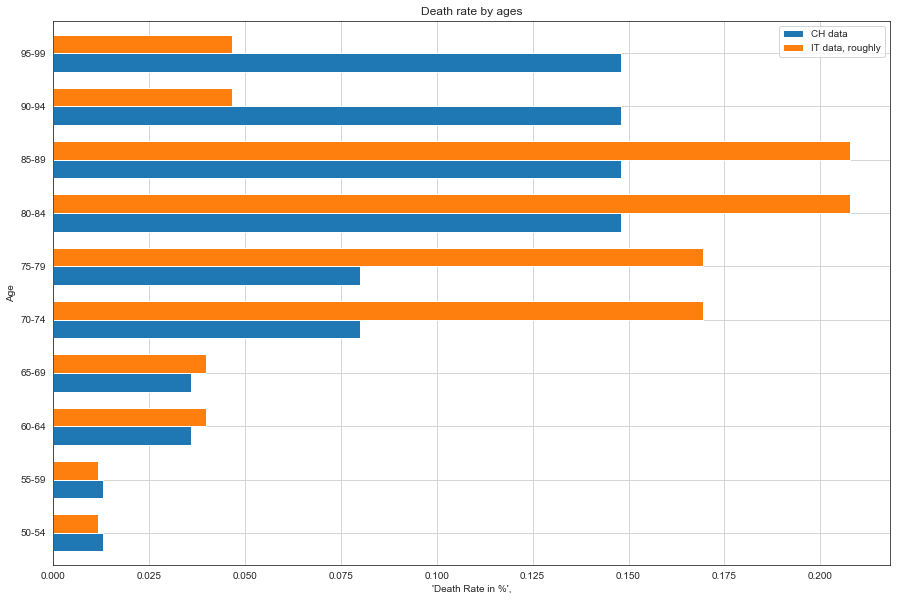

In [258]:
lines = kor_itl[10:-4].plot.barh(x='Age', y=['death_rate_A','death_rate_B'],
                                 label = ['CH data','IT data, roughly'], grid=True,
                                 title='Death rate by ages',
                                 width=0.7,
                                figsize=(15,10))
lines.set_xlabel("'Death Rate in %',");

And now one more not fully correct step - we multiply amount of people of this age group on the death rate among this group.

Why is it not correct? Well, because once again - we must consider "total case" distribution among the ages.

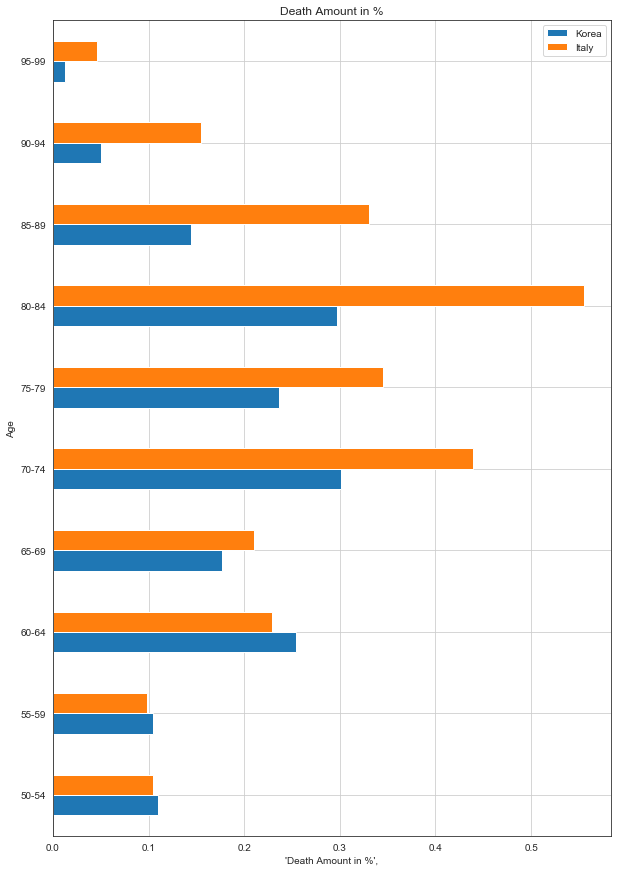

In [259]:


lines = kor_itl[10:-4].plot.barh(x='Age', y=['death_rate_korea','death_rate_italy'],
                                 label = ['Korea','Italy'], grid=True,
                                 title='Death Amount in %',
                                figsize=(10,15))
lines.set_xlabel("'Death Amount in %',");


The most significant difference is in group 80-84, as this group 
* Has very high fatality rate (14% or even 20%)
* Is underepresented in South Korea (2%) in comparision with Italy (3.7%)

But we still have a difference only in less than two times.

In [260]:
display(total70)
f'There are {total70.Italy/total70.Korea:2.2} times more 70+ people in Italy' 


Age                      70+
Korea                10.1403
Italy                17.1771
K - I               -7.03679
death_rate_A             0.9
death_rate_B        0.847551
death_rate_korea      1.0435
death_rate_italy     1.87568
dtype: object

'There are 1.7 times more 70+ people in Italy'

One of the explanation:

Almost 2 times difference in the highest risk group, 70+, leads to much more dramatical intensive therapy overflow in Italy in comparision of South Korea or any other not so "old" in general country.

Lack of intensive therapy resources totally increases death rate in 7 times.

That's how it can work. 
Let's consider, that human from the risk group 70+ will die with P=12% if he has intensive therapy resources. And 95% if he doesn't. 

And certain hospital has 100 units of this therapy facilities (medical ventilators https://en.wikipedia.org/wiki/Medical_ventilator )

We will show bellow how increasing the number of patients on 70% may increase the death rate almost 4 times

In [261]:
N_V = 100
p_help   = 0.12
p_nohelp = 0.95

# If 100 patients arrived, all of them got therapy and the death rate is
N_pat = 100
R0 = (p_help*N_pat)/N_pat
print(f'Death rate {R0*100}%')


Death rate 12.0%


In [262]:
# But what if we increase this number in 1.7

N_pat = 170
N_help = N_V
N_no_help = N_pat - N_help

K_dead_nh = N_no_help*p_nohelp
K_dead_h   =    N_help*p_help


print(f' {N_no_help} people got no support, among them {int(K_dead_nh)} will die')
print(f'{N_help} people got    support, among them {int(K_dead_h)} will die')
K = K_dead_h+ K_dead_nh
R = K/N_pat
print(f'{K} people will die, with the total death rate {int(R*100)}%')
print(f'Total death rate increased from {R0*100:03.2f}% to {R*100:2.2f}%, {R/R0:2.2} times') 


 70 people got no support, among them 66 will die
100 people got    support, among them 12 will die
78.5 people will die, with the total death rate 46%
Total death rate increased from 12.00% to 46.18%, 3.8 times


Do we have something else behind this difference?

### My hypothesis - this is also statistical artifact and it depends on measurement strategy.

Let's have a look on the data of how many check did each country performed 

https://en.wikipedia.org/wiki/COVID-19_testing

Data was saved into CSV



In [263]:
tests = pd.read_csv('covid_tests.csv', delimiter = ',')


tests[:10]

,Country or territory,Totaltests[a],Positive[b],As of,Tests permillion,"Positiveper 1,000"
0,"Italy, Veneto[1]","26,980","1,937",March 14,"5,545",72.0
1,South Korea[2],"261,335","8,086",March 13,"5,054",31.0
2,"Italy, Lombardy[3]","37,138","11,685",March 14,"3,685",315.0
3,Iceland[4][5],"1,188",117,March 12,"3,261",98.0
4,"China, Guangdong[6]","320,000",NaN,February 20,"2,820",1.4
5,Slovenia[7],"5,369",181,March 14,"2,563",33.7
6,"Italy, Emilia-Romagna[8]","10,043","2,644",March 14,"2,259",263.0
7,Italy[9],"109,170","21,157",March 14,"1,810",176.0
8,Norway[10],"8,000",895,March 12,"1,490",112.0
9,"Canada, Alberta[11]","5,458",29,March 13,"1,249",5.0


What can we see here is that South Korea is a clear leader in "Per million citizens" competion

But now let's have a look on another parameter - amount of positive tests per thousands of performed.
Leave only Italy and SKorea




In [264]:
#Filter data only for Italy and South Korea
tests[tests['Country or territory'].str.contains("Italy|Korea")].sort_values(by='Positiveper 1,000',ascending=False)


,Country or territory,Totaltests[a],Positive[b],As of,Tests permillion,"Positiveper 1,000"
2,"Italy, Lombardy[3]","37,138","11,685",March 14,"3,685",315.0
6,"Italy, Emilia-Romagna[8]","10,043","2,644",March 14,"2,259",263.0
7,Italy[9],"109,170","21,157",March 14,"1,810",176.0
0,"Italy, Veneto[1]","26,980","1,937",March 14,"5,545",72.0
1,South Korea[2],"261,335","8,086",March 13,"5,054",31.0


What can we see here

*  The "positive rate" for South Korea is 31. It means that 969 among 1000 tested people was clear. 
* And the Italian average positivity is 176. Which is roughly 6 times more.

How can this difference affect the total death rate:
* Koreans catch more cases of COVID19, including lite and moderate forms among younger generations, who has a very low death rate. 
* And Italians focus on tests only on people with critical status.
* Also >[Italy] has aggressively tested for the virus since the start of their outbreak, including with post-mortem tests, even in those not known to have the virus. 
https://www.thelocal.de/20200310/what-explains-the-low-coronavirus-death-rate-in-germany
* It means that Italians probably filled the "death" statistic with people who were COVID19 positive, but died because of other reasons and so aggressively increased the numerator of the fraction. 
* And on the other hand didn't put all the easy cases into the denominator. And that's how you get the higher value of your fractions.

So I suppose that there are two reasons behind this terrible death rate in Italy
* Partly, it explains with older society, especially in the group of 70+, which leads to hospital resources overflow
* Ignored lite cases and heavy post-mortem tests, which is measurement policy difference.



In [265]:
e=tests['Positiveper 1,000'][7]/tests['Positiveper 1,000'][1]

print(f'Italy test efficiency is {e:2.2} times more than SKorean')


Italy test efficiency is 5.7 times more than SKorean


If you have something to say, please feel free to conctact me 

const.vin@gmail.com